
# **Рубежный контроль №1**



### Вариант 31, задача 4, набор 7

## 1. Текстовое описание датасета

---



В качестве набора данных будем использовать [набор данных о приложениях в Google Play store](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

Набор данных содержит приложение, которые имеют категории, рейтинг, размер и т. д.


### Импортируем библиотеки с помощью команды import:

In [162]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py

### Загрузим датасет с помощью библиотеки Pandas:

In [163]:
df = pd.read_csv('C:\\Users\\adolf\\Downloads\\rk1\\googleplaystore.csv')

## 2. Основные характеристики датасета

In [164]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [165]:
#Определим размер датасета
size = df.shape
print("Всего строк: {}".format(size[0]))
print("Всего столбцов: {}".format(size[1]))

Всего строк: 10841
Всего столбцов: 13


In [166]:
#Список колонок с типами данных
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [167]:
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

In [168]:
#Конвертируем все размеры приложений в МБ
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [169]:
#Удалим «+» из «Количества установок», чтобы сделать его числовым.
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [170]:
#Проверка на наличие пустых значений
for col in df.columns:
    temp = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp))

App - 0
Category - 0
Rating - 1463
Reviews - 0
Size - 1227
Installs - 0
Type - 1
Price - 0
Content Rating - 0
Genres - 0
Last Updated - 0
Current Ver - 8
Android Ver - 2


In [171]:
# Удаление строк с пустыми значениями в столбцах 'Rating', 'Type', 'Content Rating', 'Current Ver' и 'Android Ver'
df_cleaned = df.dropna(subset=['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [172]:
# Проверка, что пустые значения были удалены
for col in df_cleaned.columns:
    temp = df_cleaned[df_cleaned[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp))

App - 0
Category - 0
Rating - 0
Reviews - 0
Size - 1169
Installs - 0
Type - 0
Price - 0
Content Rating - 0
Genres - 0
Last Updated - 0
Current Ver - 0
Android Ver - 0


In [173]:
#Найдём основные статичтические характеристики набора данных
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9658,9659.000000,9659,9659,9659,9651,9657
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,118,1377,2817,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1832,NaN,NaN,NaN,NaN,8902,NaN,7903,826,252,1055,2202
mean,NaN,NaN,4.173243,2.165926e+05,20.395289,7.777507e+06,NaN,1.099299,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.536625,1.831320e+06,21.827542,5.375828e+07,NaN,16.852152,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.008500,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,2.500000e+01,4.600000,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,9.670000e+02,12.000000,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,2.940100e+04,28.000000,1.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


## 3. Визуальное исследование датасета

### Средний рейтинг приложений

In [174]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
#print(type(groups.item.['BUSINESS']))
print('Average rating = ', np.nanmean(list(groups.Rating)))

Average rating =  4.170026786973072


### Как цены на приложения влияют на рейтинг приложения?

### Диаграмма расеяния

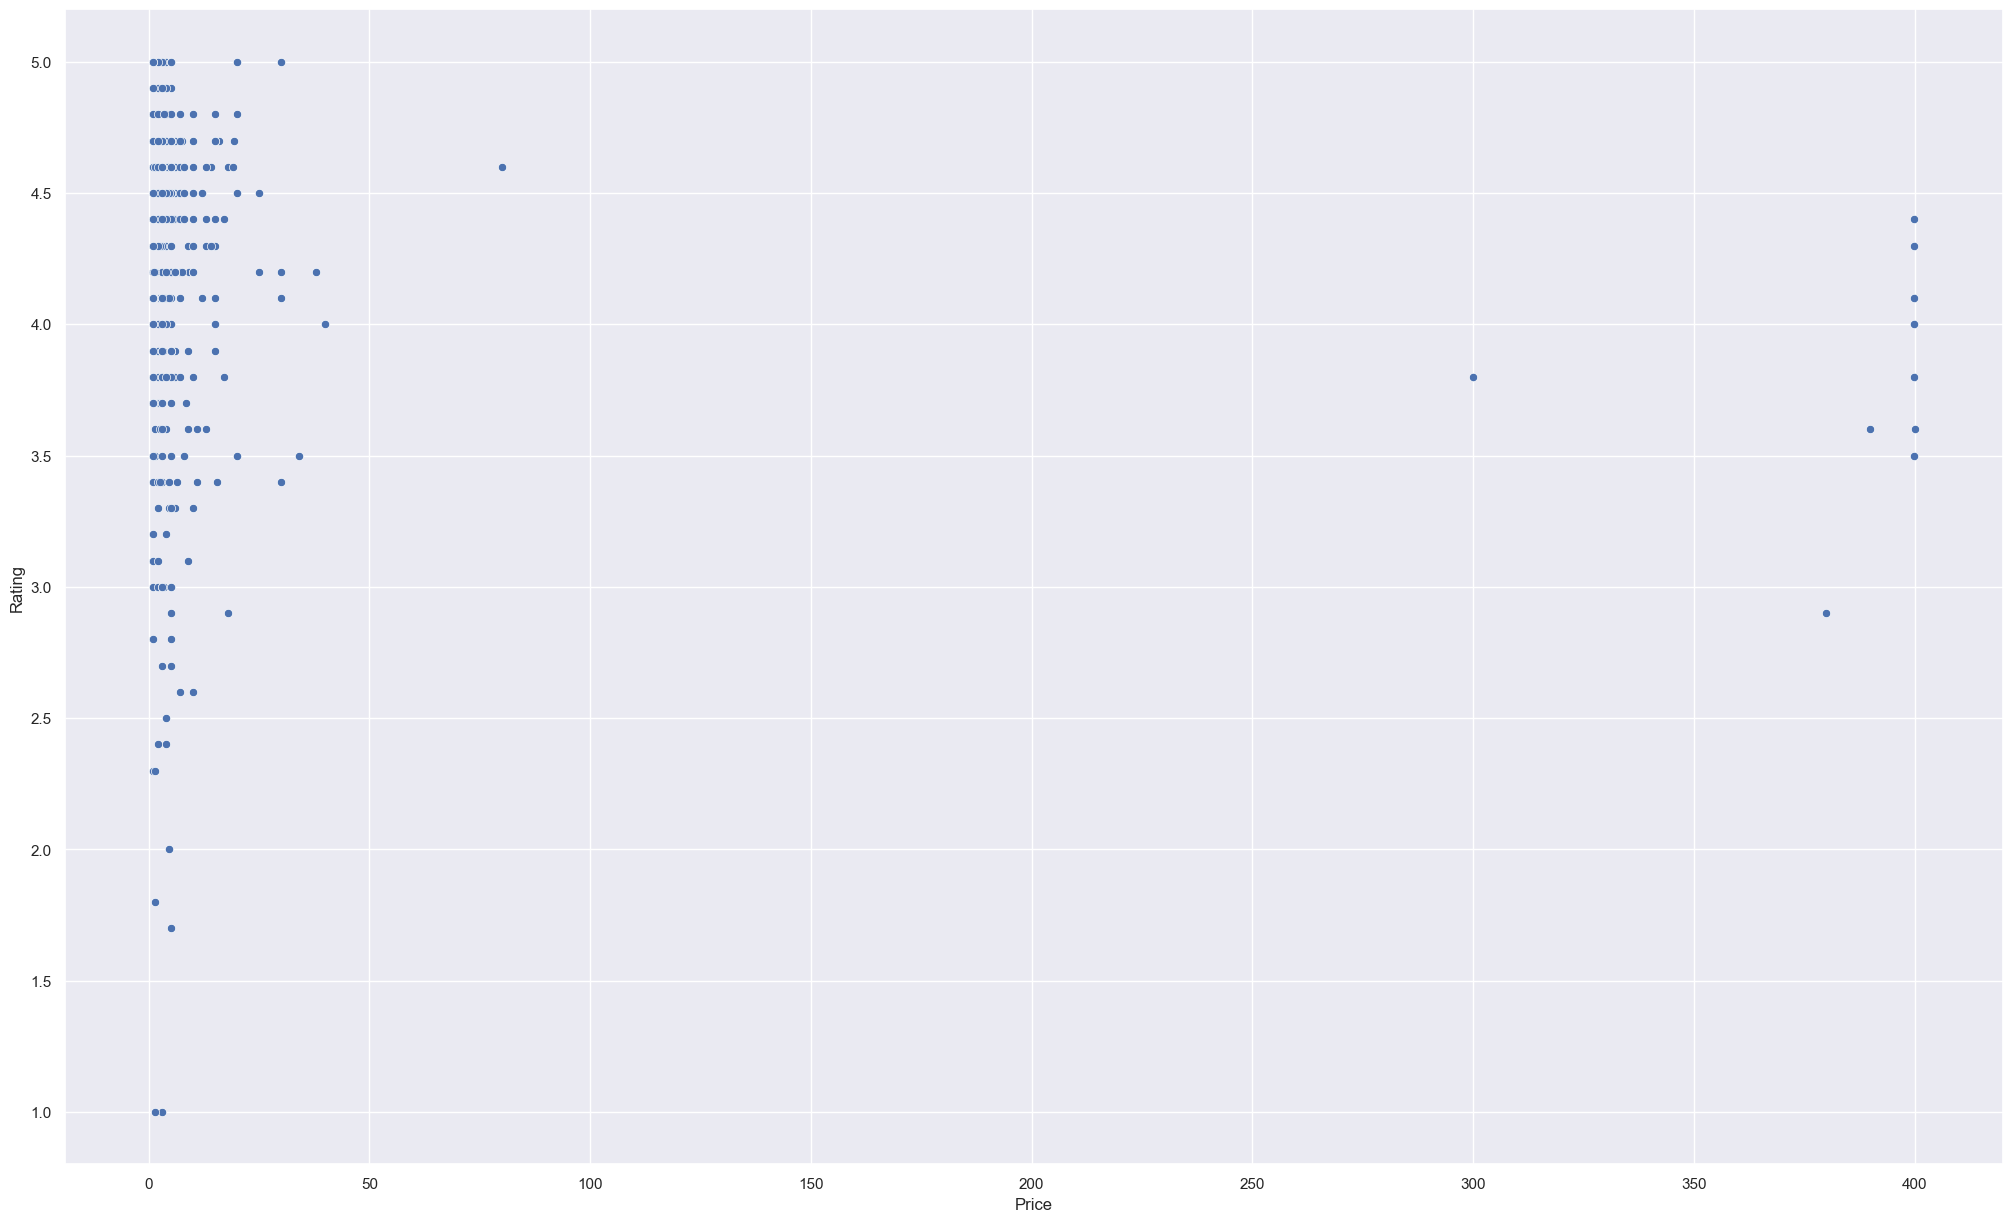

In [175]:
paid_apps = df[df.Price > 0]
p = sns.scatterplot(x="Price", y="Rating", data=paid_apps)

### Гистограмма

<Axes: xlabel='Price', ylabel='Density'>

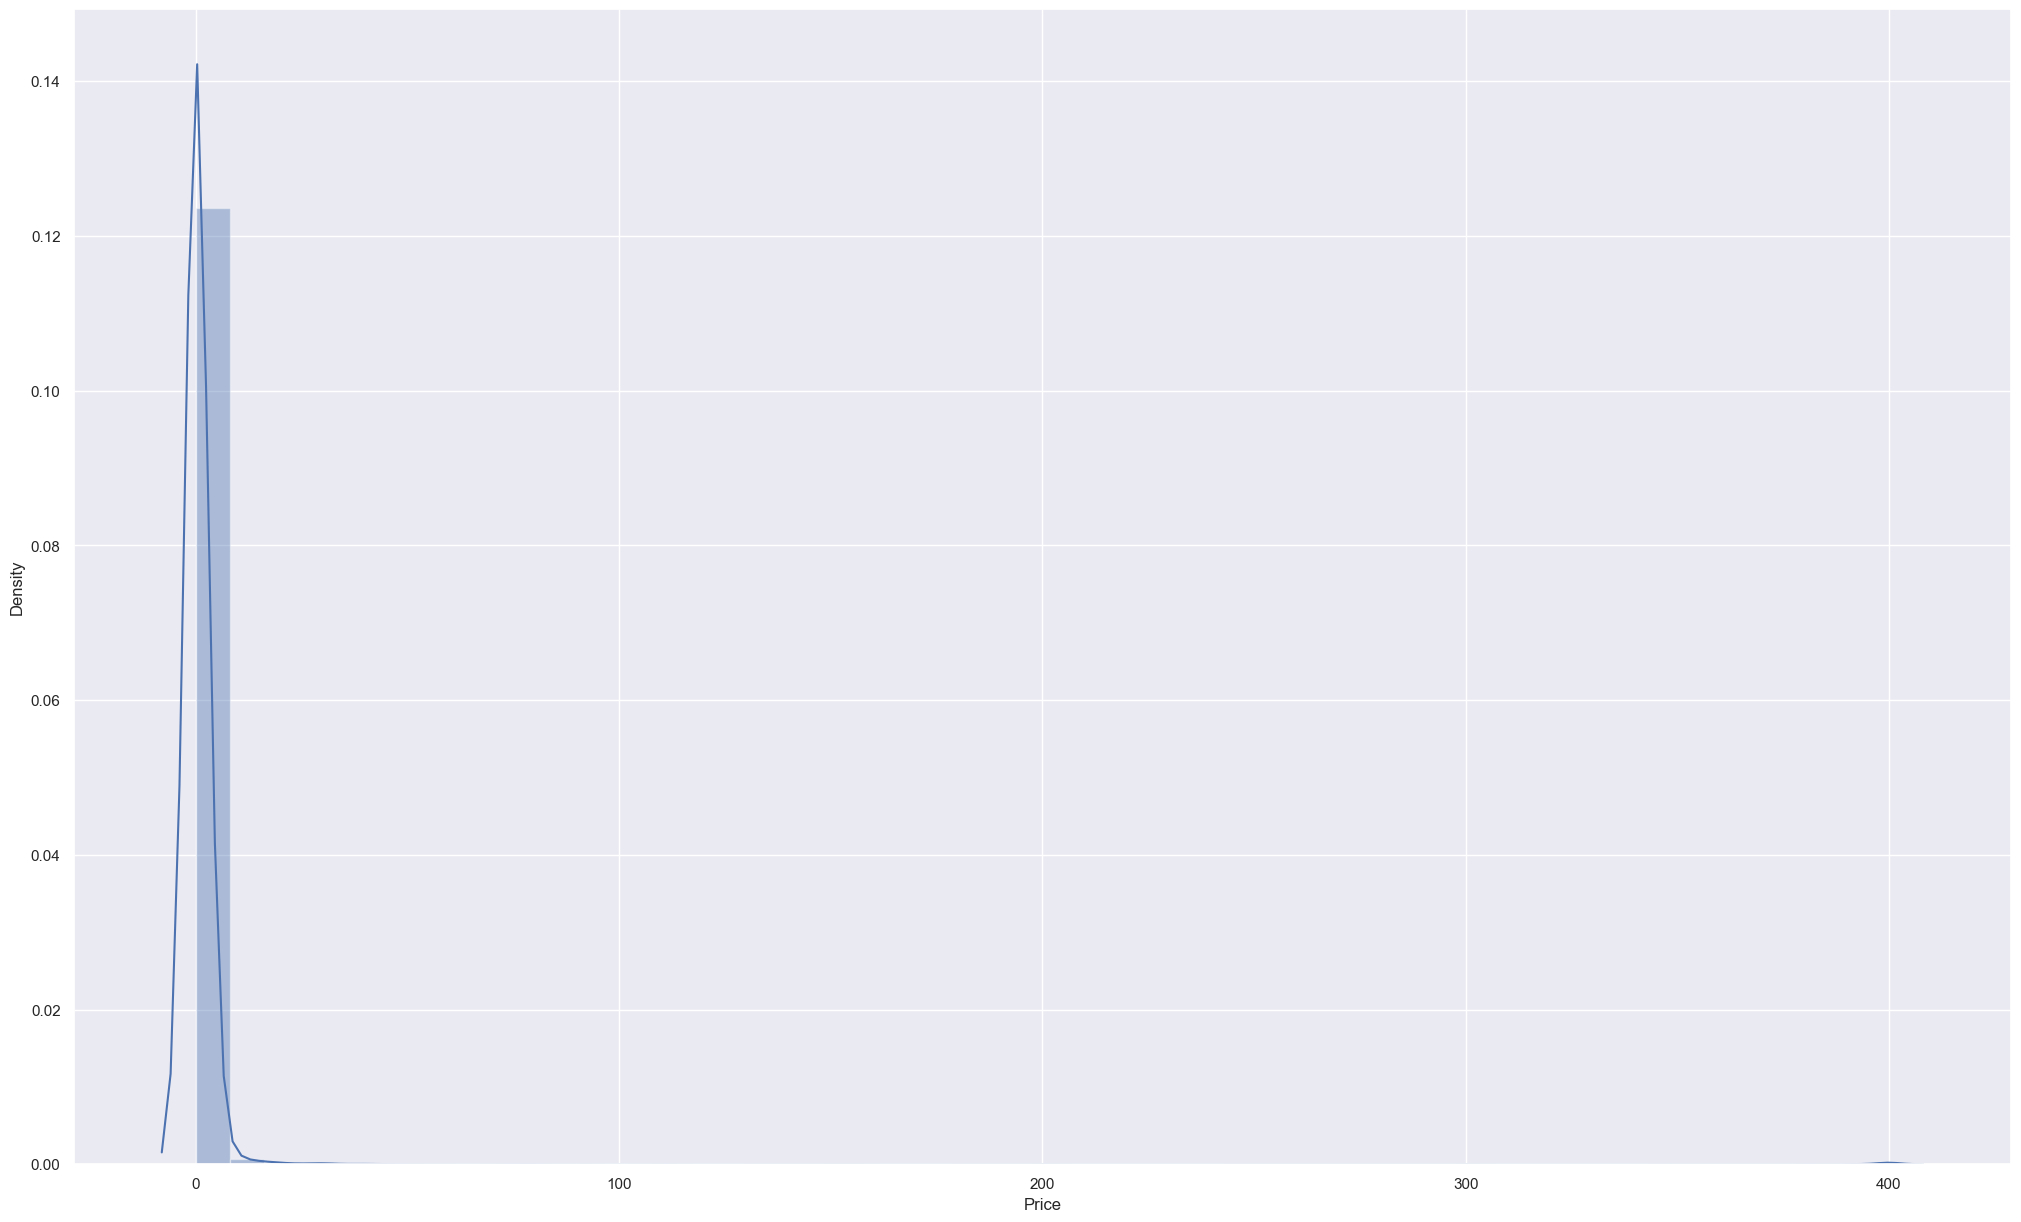

In [176]:
sns.distplot(df["Price"])

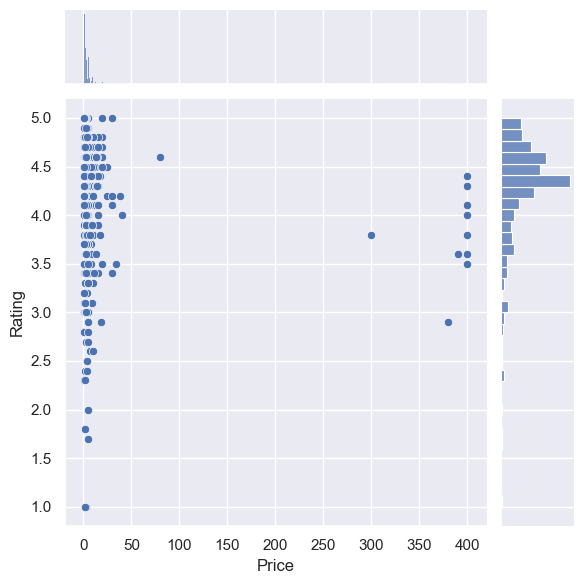

In [177]:
#Комбинация гистограмм и диаграмм рассеивания
paid_apps = df[df.Price > 0]
p = sns.jointplot(x="Price", y="Rating", data=paid_apps)

### Вывод по графику:
### Оптимальная цена большинства приложений с самым высоким рейтингом составляет от ~ 1 до ~ 30 долларов. Лишь немногие приложения стоят дороже 20 долларов.

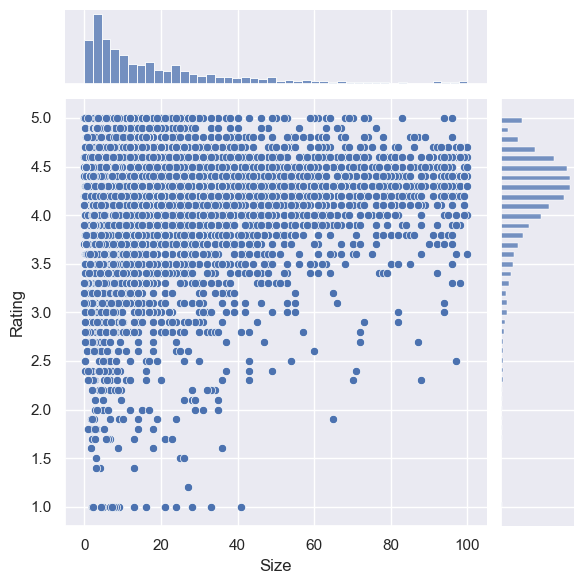

In [179]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()
sns.set_style("darkgrid")
ax = sns.jointplot(data=groups, x='Size', y='Rating')

### Вывод по графику:
### Оптимальный размер большинства приложений с самым высоким рейтингом составляет от ~2 МБ до ~40 МБ — не слишком легкий и не слишком тяжелый.

### Ящик с усами

### Платные приложения загружаются так же часто, как и бесплатные?

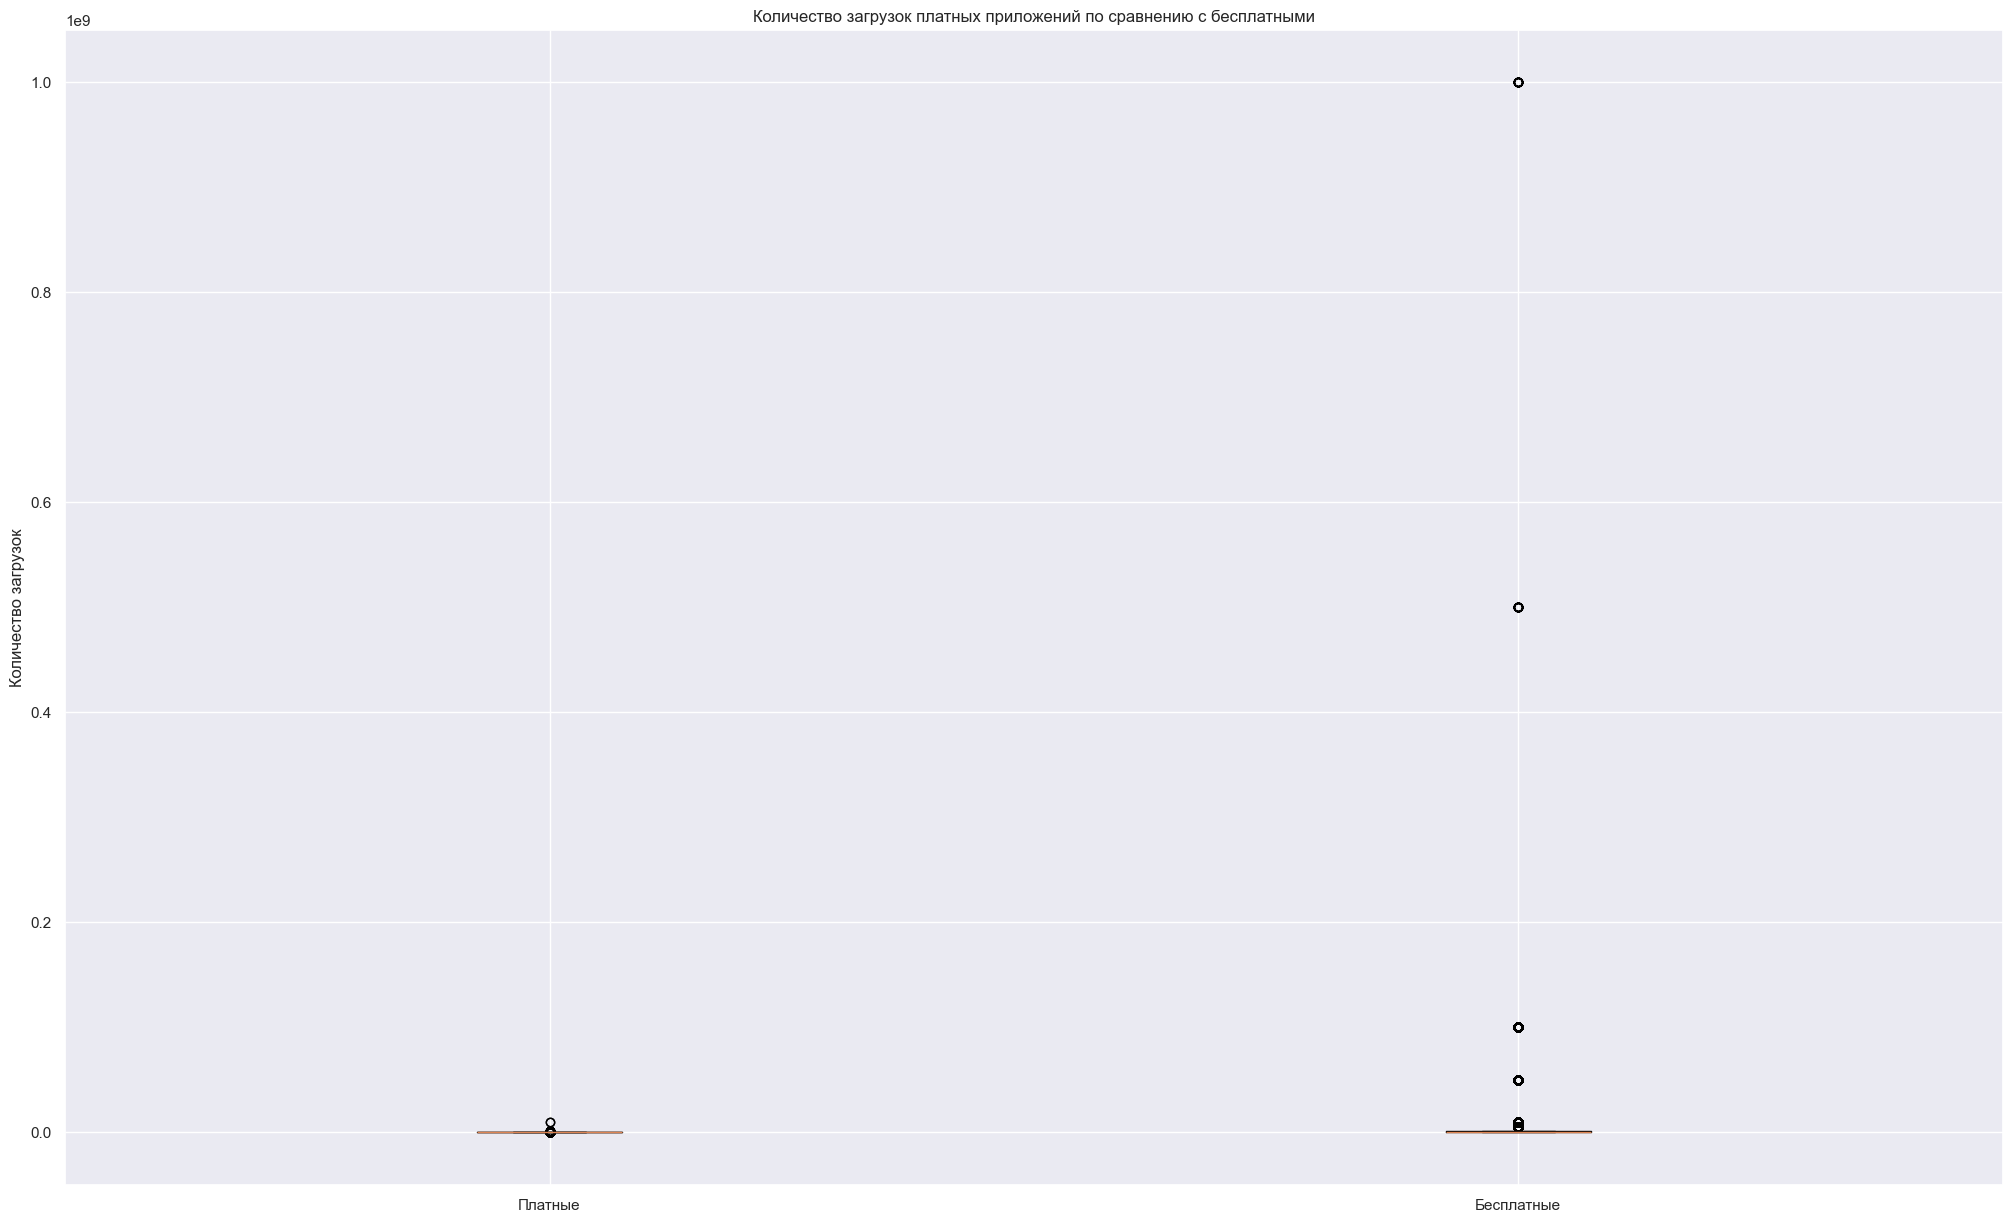

In [ ]:
# Извлекаем колонку "Installs" из DataFrame платных и бесплатных приложений
paid_apps = df[df.Price > 0]
free_apps = df[df.Price == 0]

paid_downloads = paid_apps['Installs'].values  
free_downloads = free_apps['Installs'].values  

# Собираем данные в список для построения графика
data = [paid_downloads, free_downloads]

# Построение ящика с усами
plt.boxplot(data)

# Добавляем подписи к осям и заголовок
plt.ylabel('Количество загрузок')
plt.title('Количество загрузок платных приложений по сравнению с бесплатными')

# Добавляем метки к группам данных
plt.xticks([1, 2], ['Платные', 'Бесплатные'])

# Отображаем график
plt.show()


### Вывод по графику:
### Платные приложения имеют относительно меньшее количество загрузок, чем бесплатные.

### Тепловая карта

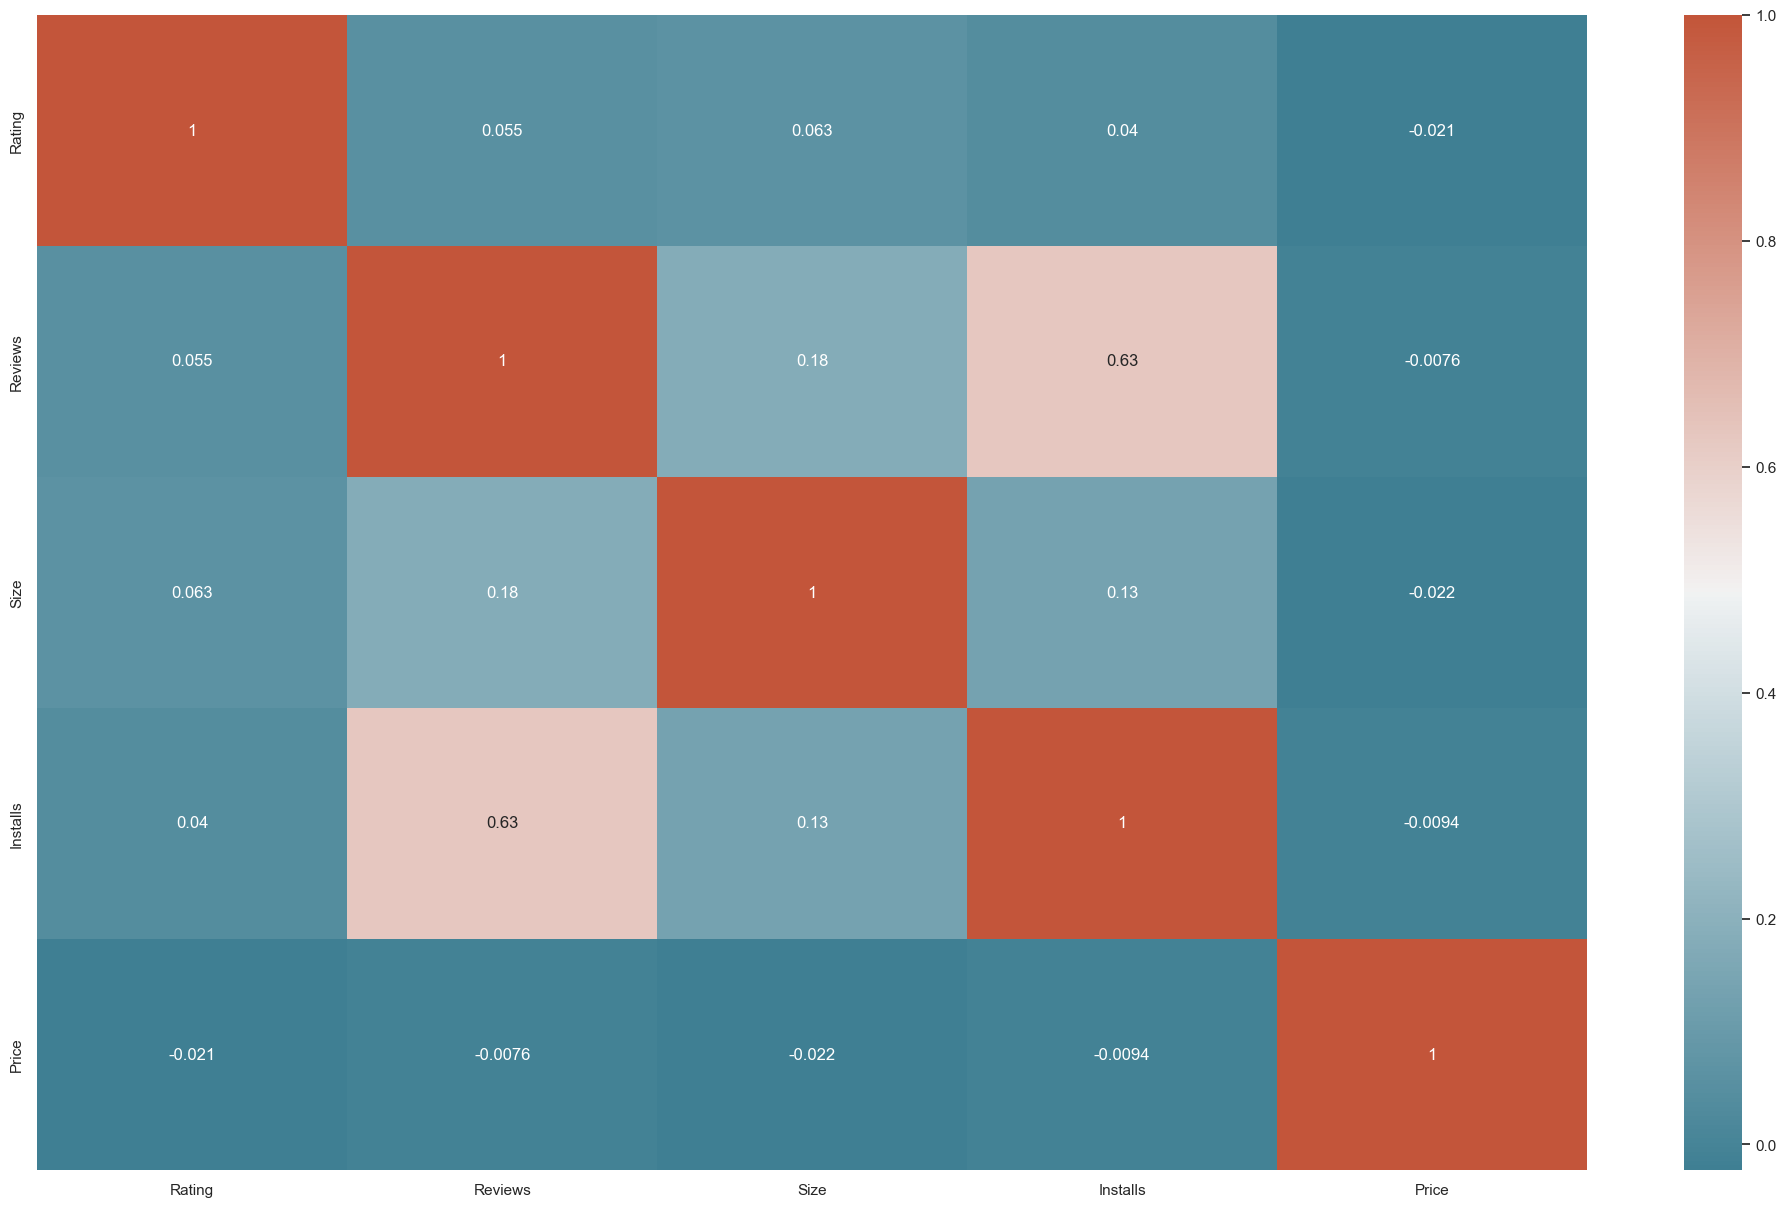

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corrmat = numeric_df.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Вывод по матрице:
### Между количеством обзоров и количеством загрузок существует умеренная положительная корреляция 0,63. Это означает, что клиенты склонны загружать данное приложение чаще, если его просмотрело большее количество людей.

### Это также означает, что многие активные пользователи, загружающие приложение, обычно также оставляют отзывы или отзывы.

## 4. Заключение

### - Средний рейтинг (активных) приложений в Google Play Store составляет 4,17
### - Оптимальный размер большинства приложений с самым высоким рейтингом составляет от ~2 МБ до ~40 МБ 
### - Оптимальная цена большинства приложений с самым высоким рейтингом составляет от ~1$ до ~30$ 
### - Пользователи склонны загружать приложение чаще, если его просмотрело большое количество людей